In [1]:
import numpy as np
import pandas as pd
import pyBigWig
import matplotlib.pyplot as plt

In [2]:
rna_bw = pyBigWig.open("rna.bw")
atac_bw = pyBigWig.open("atac.bigWig")

In [3]:
rna_intervals =rna_bw.intervals('chr19')
atac_intervals = atac_bw.intervals('chr19')

In [ ]:
#atac_intervals
#rna_bw.stats('chr19',477300,477301)[0]

In [4]:

rna_base=[]; rna_signal=[]
atac_base=[]; atac_signal=[]
for interv in rna_intervals:
    for i in range(interv[0]+1,interv[1]+1):
        rna_base.append(i)
        rna_signal.append(interv[2])
        
for interv in atac_intervals:
    if interv[2]:
        for i in range(interv[0]+1,interv[1]+1):
            atac_base.append(i)
            atac_signal.append(interv[2])


In [ ]:
#atac_base

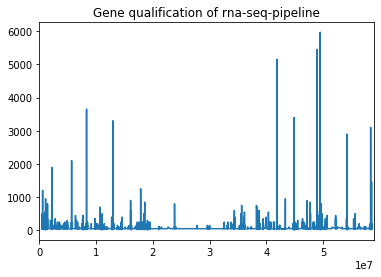

In [5]:

plt.figure()
plt.title("Gene qualification of rna-seq-pipeline")
plt.plot(rna_base, rna_signal)
plt.xlim((0,59000000))

plt.show()


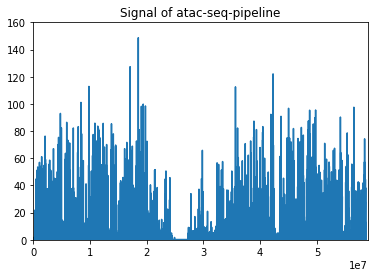

In [570]:

plt.figure()
plt.title("Signal of atac-seq-pipeline")
plt.plot(atac_base, atac_signal)
plt.xlim((0,59000000))
plt.ylim((0,160))

plt.show()


In [ ]:
part = []
for ranges in rna_intervals:
    for i in range(ranges[0]+1,ranges[1]+1):
        part.append(i)

In [ ]:
#part

In [ ]:
sep_all = []
sep = []
for i in range(len(part)-1):
    if part[i]+1 == part[i+1]:
        sep.append((part[i],rna_bw.stats("chr19",part[i]-1,part[i])[0]))
    else:
        sep.append((part[i],rna_bw.stats("chr19",part[i]-1,part[i])[0]))
        sep_all.append(sep)
        sep = []

In [ ]:
sep_all

In [ ]:
"""
Sum = 0
length = 0
for region in rna_intervals:
    Sum += region[2]*(region[1] - region[0])
    length += region[1]-region[0]
mean = Sum/length
mean
"""

In [452]:
#deleting constant array and low signal array
region2 = []
for reg in sep_all:
    cnt = 0
    qcnt = 0
    for i in range(len(reg)-1):
        if reg[i][1] == reg[i+1][1]:
            cnt += 1
        if reg[i][1] in mx2:
            qcnt += 1
    if cnt != len(reg)-1 and qcnt > 0:
        region2.append(reg)

In [453]:
len(region2)

0

In [ ]:
"""
atac_seq_with_rna_all = []
for reg in region2:
    atac_seq_with_rna = []
    for i in range(reg[0][0]-1000,reg[0][0]):
        atac_seq_with_rna.append((i,atac_bw.stats('chr19',i-1,i)[0]))
    atac_seq_with_rna_all.append(atac_seq_with_rna)
"""

In [179]:
#qc
sep2 = []
sep_all2= []
ct = 0
for interv in atac_intervals:
    #if interv[2]:
    if interv[2] in mx:
        sep2.append(interv)
        #ct += 1
    else:
        if len(sep2) > 0: # and ct > 0:
            sep_all2.append(sep2)
        sep2=[]
    #    ct = 0

In [181]:
len(sep_all2)

13

In [ ]:
#len(atac_seq_with_rna_all)

In [109]:
#used
mean2 = rna_bw.stats('chr19')[0]
mx2 = rna_bw.stats('chr19',type="max", nBins=3) #10
mx2

[3650.364990234375, 1250.125, 5967.26318359375]

In [110]:
peak_all2 = []
for interv in rna_intervals:
    if interv[2] in mx2:
        peak3 = []
        for i in range(interv[0]+1,interv[1]+1):
            peak3.append((i,interv[2]))
        peak_all2.append(peak3)

In [111]:
len(peak_all2)

83

In [112]:
rna_peak_group = []
for region in peak_all2:
    pre_ = [(i,rna_bw.stats('chr19',i-1,i)[0]) for i in range(region[0][0]-500,region[0][0])]
    app_ = [(i,rna_bw.stats('chr19',i-1,i)[0]) for i in range(region[-1][0]+1,region[-1][0]+501)]
    rna_peak_group.append(pre_ + region + app_)

In [12]:
rna_peak_group

[[(579111, 0.09380999952554703),
  (579112, 0.09380999952554703),
  (579113, 0.09380999952554703),
  (579114, 0.09380999952554703),
  (579115, 0.09380999952554703),
  (579116, 0.09380999952554703),
  (579117, 0.09380999952554703),
  (579118, 0.09380999952554703),
  (579119, 0.09380999952554703),
  (579120, 0.09380999952554703),
  (579121, 0.09380999952554703),
  (579122, 0.09380999952554703),
  (579123, 0.09380999952554703),
  (579124, 0.09380999952554703),
  (579125, 0.09380999952554703),
  (579126, 0.09380999952554703),
  (579127, 0.09380999952554703),
  (579128, 0.09380999952554703),
  (579129, 0.09380999952554703),
  (579130, 0.09380999952554703),
  (579131, 0.09380999952554703),
  (579132, 0.09380999952554703),
  (579133, 0.09380999952554703),
  (579134, 0.09380999952554703),
  (579135, 0.09380999952554703),
  (579136, 0.09380999952554703),
  (579137, 0.09380999952554703),
  (579138, 0.09380999952554703),
  (579139, 0.09380999952554703),
  (579140, 0.09380999952554703),
  (579141,

In [99]:
#used
mean = atac_bw.stats('chr19')[0]
mx = atac_bw.stats('chr19',type="max", nBins=22) #22
mx

[76.28514099121094,
 92.99079895019531,
 86.44756317138672,
 112.85433197021484,
 85.81997680664062,
 85.37361907958984,
 148.67123413085938,
 148.67123413085938,
 51.62940979003906,
 45.74604034423828,
 37.218910217285156,
 65.83293151855469,
 57.58063888549805,
 112.53785705566406,
 87.32150268554688,
 122.07192993164062,
 122.07192993164062,
 96.76371002197266,
 95.5154037475586,
 70.99954223632812,
 90.29562377929688,
 97.53990936279297]

In [100]:
peak_all = []
for interv in atac_intervals:
    if interv[2] in mx:
        peak3 = []
        for i in range(interv[0]+1,interv[1]+1):
            peak3.append((i,interv[2]))
        peak_all.append(peak3)

In [101]:
len(peak_all)

31

In [102]:
atac_peak_group = []
for region in peak_all:
    pre_ = [(i,atac_bw.stats('chr19',i-1,i)[0]) for i in range(region[0][0]-500,region[0][0])]
    app_ = [(i,atac_bw.stats('chr19',i-1,i)[0]) for i in range(region[-1][0]+1,region[-1][0]+501)]
    atac_peak_group.append(pre_ + region + app_)

In [66]:
atac_peak_group

[[(2096186, 0.9509000182151794),
  (2096187, 0.9509000182151794),
  (2096188, 0.9509000182151794),
  (2096189, 0.9509000182151794),
  (2096190, 1.5247700214385986),
  (2096191, 1.5247700214385986),
  (2096192, 1.5279899835586548),
  (2096193, 1.5279899835586548),
  (2096194, 1.861430048942566),
  (2096195, 1.861430048942566),
  (2096196, 1.861430048942566),
  (2096197, 1.861430048942566),
  (2096198, 1.5279899835586548),
  (2096199, 1.5279899835586548),
  (2096200, 1.861430048942566),
  (2096201, 1.861430048942566),
  (2096202, 1.861430048942566),
  (2096203, 1.861430048942566),
  (2096204, 1.861430048942566),
  (2096205, 1.861430048942566),
  (2096206, 1.861430048942566),
  (2096207, 1.861430048942566),
  (2096208, 1.5312199592590332),
  (2096209, 1.5312199592590332),
  (2096210, 1.5312199592590332),
  (2096211, 1.5312199592590332),
  (2096212, 1.8651200532913208),
  (2096213, 1.8651200532913208),
  (2096214, 1.8651200532913208),
  (2096215, 1.8651200532913208),
  (2096216, 1.86512005

In [63]:
#atac_peak_group.reverse()

In [64]:
#atac_peak_group

In [51]:
"""
new_atac2 = []
new_rna2 = []
for rna in rna_peak_group:
    new_atac = []
    new_rna = []
    for atac in atac_peak_group:
        if rna[0][0] > atac[-1][0]:
            new_rna.append(rna)
            new_atac.append(atac)
            new_rna2.append(new_rna)
            new_atac2.append(new_atac)
            break
    #if len(new_atac) > 0:
    #    break
"""

In [ ]:
"""
region=[]
for reg in sep_all2:
    reg2=[]
    for interv in reg:
        for base in range(interv[0]+1,interv[1]+1):
            reg2.append((base,interv[2]))
    region.append(reg2)
"""

In [113]:
atac_qc_sign = pd.DataFrame(atac_peak_group)
rna_qc_sign = pd.DataFrame(rna_peak_group)

In [114]:
rna_qc_sign.shape

(83, 1031)

In [115]:
atac_qc_sign.shape

(31, 1011)

In [116]:
atac_qc_sign.to_csv("atac_qc2.tsv",index=False)
rna_qc_sign.to_csv("rna_qc2.tsv",index=False)